## More image processing

In [2]:
# We need to include the home directory in our path, so we can read in our own module.
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

__Load image__

In [2]:
image = cv2.imread(os.path.join("..", "data", "img", "terasse.jpeg"))

In [ ]:
jimshow(image, "Original image")

## Plot colour historgrams

```cv2.calcHist([image], channels, mask, histSize, ranges[, hist[, accumulate]])```

- images : it is the source image of type uint8 or float32 represented as “[img]”.
- channels : it is the index of channel for which we calculate histogram. 
    - For grayscale image, its value is [0] and
    - color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- mask : mask image. To find histogram of full image, it is given as “None”.
- histSize : this represents our BIN count. For full scale, we pass [256].
- ranges : this is our RANGE. Normally, it is [0,256].

__Only blue channel__

In [ ]:
hist = cv2.calcHist([image], [0], None, [256], [0,256])
plt.plot(hist, color="Blue")

In [ ]:
hist = cv2.calcHist([image], [1], None, [256], [0,256])
plt.plot(hist, color="Green")

In [ ]:
hist = cv2.calcHist([image], [2], None, [256], [0,256])
plt.plot(hist, color="Red")

__Split channels__

In [7]:
(BLUE, GREEN, RED) = cv2.split(image)

In [ ]:
hist = cv2.calcHist([RED], [0], None, [256], [0,256])
plt.plot(hist, color="r")

## Plot multiple channels at the same time

In [ ]:
# split channels
channels = cv2.split(image)
# names of colours
color_names = ["b", "g", "r"]
# create figure
plt.figure()
# add title
plt.title("Multiple channels")
# add xlabel
plt.xlabel("Bins")
# add ylabel
plt.ylabel("Number of pixels")

# loop over our channels
for channel, color_name in zip(channels, color_names):
    # Create a histogram
    hist = cv2.calcHist([channel], [0], None, [256], [0,256])
    # Plot histogram
    plt.plot(hist, color = color_name)
    # Set limit of x-axis
    plt.xlim([0, 256])

# show the plot
plt.show()

__Comparing histograms__

In [6]:
image = cv2.imread(os.path.join("..", "..", '..','CDS-VIS', "img", "the_bedroom.jpg"))
image2 = cv2.imread(os.path.join("..", "..", '..','CDS-VIS', "img", "the_bedroom.jpg"))

In [8]:
jimshow(image, "Image 1")

In [ ]:
jimshow(image2, "Image 2")

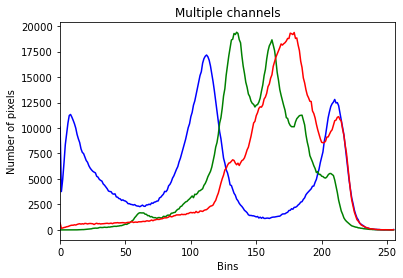

In [9]:
# split channels
channels = cv2.split(image2)
# names of colours
color_names = ["b", "g", "r"]
# create figure
plt.figure()
# add title
plt.title("Multiple channels")
# add xlabel
plt.xlabel("Bins")
# add ylabel
plt.ylabel("Number of pixels")

# loop over our channels
for channel, color_name in zip(channels, color_names):
    # Create a histogram
    hist = cv2.calcHist([channel], [0], None, [256], [0,256])
    # Plot histogram
    plt.plot(hist, color = color_name)
    # Set limit of x-axis
    plt.xlim([0, 256])

# show the plot
plt.show()

## Multidimensional histograms

Now that we are working with multi-dimensional histograms, we need to keep in mind the number of bins we are using. 

In previous examples, I’ve used 256 bins for demonstration purposes. However, if we used a 256 bins for each dimension in a 2D histogram, our resulting histogram would have 256 × 256 = 65,536 separate pixel counts. Not only is this wasteful of resources, it’s not practical. 

Most applications use somewhere between 8 and 64 bins when computing multi-dimensional histograms. So we use 32 instead of 256.

In [ ]:
# Create matplotlib figure
fig = plt.figure(figsize=(20,10))
# plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([image[1], image[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist)
ax.set_title("2D Color Histogram for Green and Blue")
plt.colorbar(p)

__Adding multiple plots to one visualisation__

In [ ]:
# Create matplotlib figure
fig = plt.figure(figsize=(20,10))

# plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([image[1], image[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist)
ax.set_title("2D Color Histogram for Green and Blue")
plt.colorbar(p)

# plot a 2D color histogram for green and red
ax = fig.add_subplot(132)
hist = cv2.calcHist([image[1], image[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist)
ax.set_title("2D Color Histogram for Green and Red")
plt.colorbar(p)

# plot a 2D color histogram for blue and red
ax = fig.add_subplot(133)
hist = cv2.calcHist([image[0], image[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist)
ax.set_title("2D Color Histogram for Blue and Red")
plt.colorbar(p)

## Comparing histograms

__Extract histograms__

In [10]:
hist1 = cv2.calcHist([image], [0,1,2], None, [8,8,8], [0,256, 0,256, 0,256])

In [11]:
hist2 = cv2.calcHist([image2], [0,1,2], None, [8,8,8], [0,256, 0,256, 0,256])

__MinMax normalization__

Before comparing historgrams, we first have to normalise them to occur within a narrower ranger of values. Why do we need to do this?

We're doing to use MinMax normalisation, which we calculate in the following way for each value:

```norm_pixel = (value-min) / (max-min)```

In [ ]:
hist1 = cv2.normalize(hist1, hist1, 0,255, cv2.NORM_MINMAX)
hist2 = cv2.normalize(hist2, hist2, 0,255, cv2.NORM_MINMAX)

__Comparing the first two histograms__

In [ ]:
round(cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR), 2)

222295.2

__Load a new image__

In [ ]:
image3 = cv2.imread(os.path.join("..", "data", "img", "florence.jpg"))

In [ ]:
jimshow(image3, "Image 3")

__Compare with image 1__

In [ ]:
hist3 = cv2.calcHist([image3], [0,1,2], None, [8,8,8], [0,256, 0,256, 0,256])
hist3 = cv2.normalize(hist3, hist3, 0,255, cv2.NORM_MINMAX)

In [ ]:
round(cv2.compareHist(hist1, hist1, cv2.HISTCMP_CHISQR), 2)

0.0

In [ ]:
round(cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR), 2)

222295.2

In [ ]:
round(cv2.compareHist(hist1, hist3, cv2.HISTCMP_CHISQR), 2)

66998.5